

# Project: Investigate a Dataset (Medical Appointments in Brazil and showing up)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In our dataset we have the medical appointments in brazil that has many columns that will give us some hints on our datasets. In our dataset we have 110527 medical appointments and give us if the patient showed or not.
We have many columns in the datasets: (PatientId, Gender, No-show and so on).

Research questions:

1-What is the Relationship between the Ages and No-Show?


2-What is the relationship between alcohlism and and No-Show and Diabetes?



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section we will use pandas to read the data then we will get the duplication of the data and the wrong data such as the ages if there is an age equal to -1 or any minus number which is not correct
### General Properties

In [2]:
#Read the CSV
noshowappointments = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
noshowappointments.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [3]:
noshowappointments.shape

(110527, 14)

In [4]:
noshowappointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
noshowappointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#To get how many values for each column, we can do this by using nunique function
noshowappointments.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# We will use isnull().sum() to get the missing values in noshowappointments data set
noshowappointments.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#to check if there is a negative values in the Age 
noshowappointments.Age.min()

-1

In [9]:
#To check the duplicated values in the data set we will use duplicated() function 
sum(noshowappointments.duplicated())

0

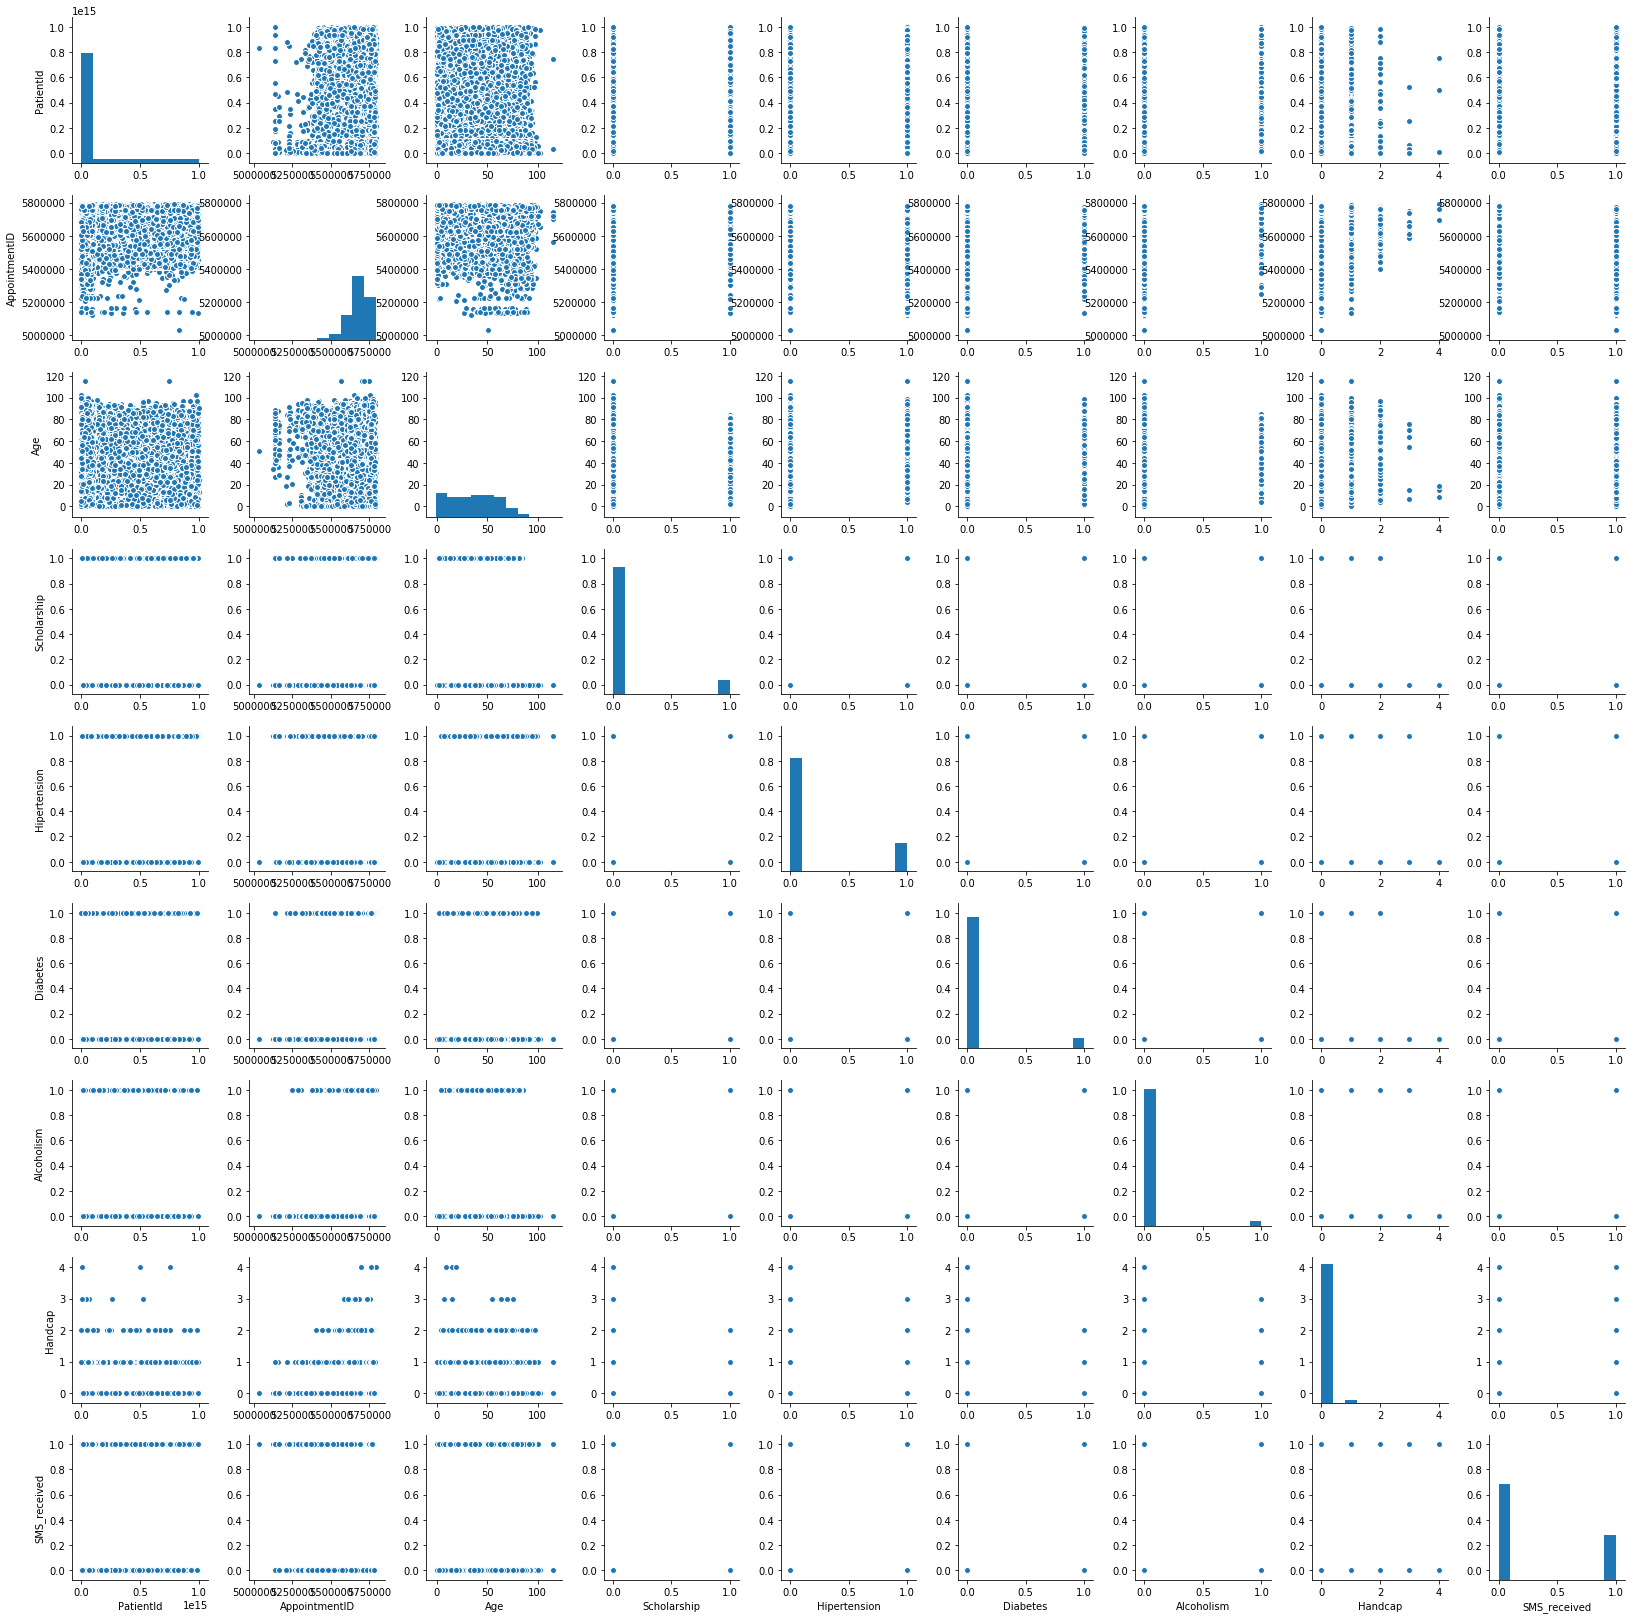

In [10]:
#now we will plot the data set using seaborn 
sns.pairplot(noshowappointments)





### Data Cleaning 
In this section we will drop any negative values in ages and we will change the column names and I will change the Gender to female and male

In [11]:


#From the above code we can notice that there is a negative Age which is impossible 
#so we need to drop this and to do that we will need to get the index of this Age and we will use queries 

noshowappointments.query('Age == "-1"')



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#from the above we get the index and I will drop this Patient
noshowappointments.drop(noshowappointments.index[99832], inplace = True)


In [13]:
#now we will check if we drop or not
noshowappointments.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
#nice we droped the patient successfully 
noshowappointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [15]:
#now I will Rename the columns
noshowappointments.rename(columns = {'PatientId':'Patient-Id', 'AppointmentID':'Appointment-ID', 'ScheduledDay':'Scheduled-Day',\
                     'AppointmentDay':'Appointment-Day', 'SMS_received':'SMS-received'}, inplace = True)

noshowappointments.describe()

,Patient-Id,Appointment-ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS-received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#now I will create dummy for the gender to show the male and female patient  
dum = pd.get_dummies(noshowappointments['Gender'])
# to check the dummies
dum.head() 

,F,M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [17]:
# now we will concatenate the dummy with the data set 
noshowappointments = pd.concat([noshowappointments, dum], axis=1)
#now to check the data set after adding the dummies
noshowappointments.head() 

,Patient-Id,Appointment-ID,Gender,Scheduled-Day,Appointment-Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS-received,No-show,F,M
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [18]:
#now after showing the gender in the form of dummies, now I will remove the Gender column
noshowappointments.drop(['Gender'], axis = 1, inplace = True)

In [19]:
#now to show the columns
noshowappointments.describe()

,Patient-Id,Appointment-ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS-received,F,M
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.649974,0.350026
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.476980,0.476980
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Relationship between the Ages and No-Show)

In [20]:

show_miss = noshowappointments["No-show"].value_counts()
Percent= (show_miss[1]/ show_miss.sum()) * 100
print("Percent of missed the appointment: %",Percent )

Percent of missed the appointment: % 20.1934386479


We can see there is 20% of the appointments are missed (1 from 5 appointment will be missed) which is large number that we must handle 

Now we are trying to plot the relationship betwwen the Ages and the probabilty of coming to the appointment
and to do that first we need to create a function to retrieve the probabilty of the comming to the appointment then 
we will use seaborn to plot the relationship

In [21]:

def Con(dataset, categories, labels=None):
    minim = dataset.min()
    maxim = dataset.max()
    
    #now we will add maximum and minimum for categories
    break_points = [minim] + categories + [maxim]
    
    #Here we will use cut function to binning the ages
    dataframeBin = pd.cut(dataset, bins = break_points, labels = labels, include_lowest = True)
    return dataframeBin
categories = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
categories_labels = ["Baby","Child","teen","young","35 - 45", "45 - 55", "55 - 65", "Retired", "75 - 85", "85 - 95", "Old"]
noshowappointments["AgeCon"] = Con(noshowappointments["Age"], categories, categories_labels)



print(pd.value_counts(noshowappointments["AgeCon"], sort = False))

Baby       11731
Child      12737
teen       14131
young      14404
35 - 45    14582
45 - 55    15437
55 - 65    14203
Retired     7909
75 - 85     4232
85 - 95     1114
Old           46
Name: AgeCon, dtype: int64


In [22]:

noshowappointments["AgeCon"] = Con(noshowappointments["Age"], categories, categories_labels)
#Grouping
noshowappointments.groupby(['No-show', 'AgeCon']).size()

No-show  AgeCon 
No       Baby        9546
         Child       9674
         teen       10561
         young      11122
         35 - 45    11500
         45 - 55    12603
         55 - 65    11966
         Retired     6713
         75 - 85     3557
         85 - 95      926
         Old           39
Yes      Baby        2185
         Child       3063
         teen        3570
         young       3282
         35 - 45     3082
         45 - 55     2834
         55 - 65     2237
         Retired     1196
         75 - 85      675
         85 - 95      188
         Old            7
dtype: int64

In [23]:
sns.set()

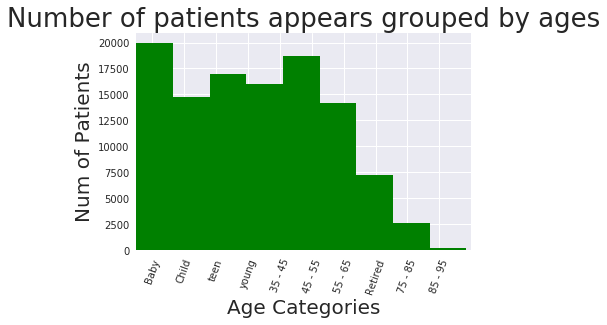

In [27]:
#Generating a histogram
show = noshowappointments['Age'].plot(kind='hist', color = "green")
show.set_xticks(categories)
show.set_xticklabels(categories_labels, rotation= 70 )

plt.xlabel('Age Categories', fontsize= 20)
plt.ylabel('Num of Patients', fontsize=20)
plt.title('Number of patients did not appeared( grouped by ages)', fontsize=26)
plt.xlim([0, 105])

plt.show()

As we can see young people comes to the appointment less than the old people (even if we see the percentage of coming we can see for example the ages between 25 and 35 come to the appointment much lower than old people and that is because they have to work in the mornin )

### Research Question 2  (Relationship between No-Show with Alcoholism and Diabetes)

Text(0,0.5,'Percentage of showing')

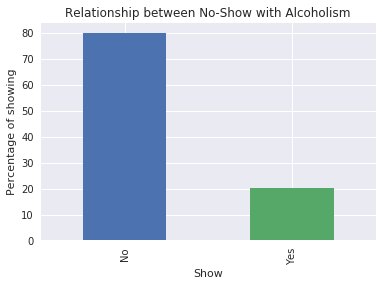

In [28]:
#now in this Exploratory will compare of showing between Alcholism and  
NumberOfAlch = sum(noshowappointments.groupby(['No-show']).sum()['Alcoholism'])
Alch = noshowappointments.groupby(['No-show']).sum()['Alcoholism']/NumberOfAlch * 100
Alch.plot.bar()
plt.title('Relationship between No-Show with Alcoholism')
plt.xlabel('Show')
plt.ylabel('Percentage of showing')

Text(0,0.5,'Percentage of showing')

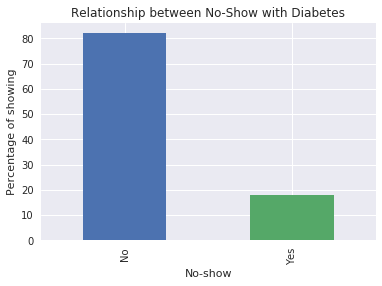

In [29]:
NumberOfDiabetes = sum(noshowappointments.groupby(['No-show']).sum()['Diabetes'])
Diab = noshowappointments.groupby(['No-show']).sum()['Diabetes']/NumberOfDiabetes * 100
Diab.plot.bar()
plt.title('Relationship between No-Show with Diabetes')
plt.xlabel('No-show')
plt.ylabel('Percentage of showing')

We can see people with alcoholism showing less than people with diabetes but not that much and that's may be because they have a clear mind not like people with alcohlism 

<a id='conclusions'></a>
## Conclusions
We can conclude that people missed almost 20% of there appointment even though for each appointment there is SMS-message sents to the patient but some patients didn't show up.

We also can conclude that the people with alcoholic show less than the average and that's something that we need to see the reasons of that.



